In [1]:
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt

## Define necessary function

In [2]:
# Gaussian distrubtion for latent space

def generate_latent_points(latent_dim, n_samples):
    # Generate points in latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # Reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# Load dataset - default : emojis set
def load_real_samples(dataset_file='emojis-dataset.npz'):
    data = np.load(dataset_file)
    X = data['arr_0']
    # Convert from unsigned ints to floats
    X = X.astype('float32')
    # Scale from [0, 255] to [-1, 1] for the 'tanh' activation function
    X = (X - 127.5) / 127.5
    return X

## Variance on ouput set and real dataset

In [3]:
# load model
model = keras.models.load_model('./e075_generator.h5')

#50 samples with 100-dimension noise (input shape of model) 
latentspace = generate_latent_points(100,50)

# Generate images from noise - latent point:
images = model.predict(latentspace)

## Variance on pixel point

In [4]:
latent_variances = []
image_variances = []
# For each pair (noise-output), find variance of pixel points for images and features for noise.
for i in range(50):
	var_f = np.var(latentspace[i])
	var_img = np.var(images[i])
	latent_variances.append(var_f)
	image_variances.append(var_img)

print("NUMBER OF SAMPLE :{}".format(len(latent_variances)))

NUMBER OF SAMPLE :50


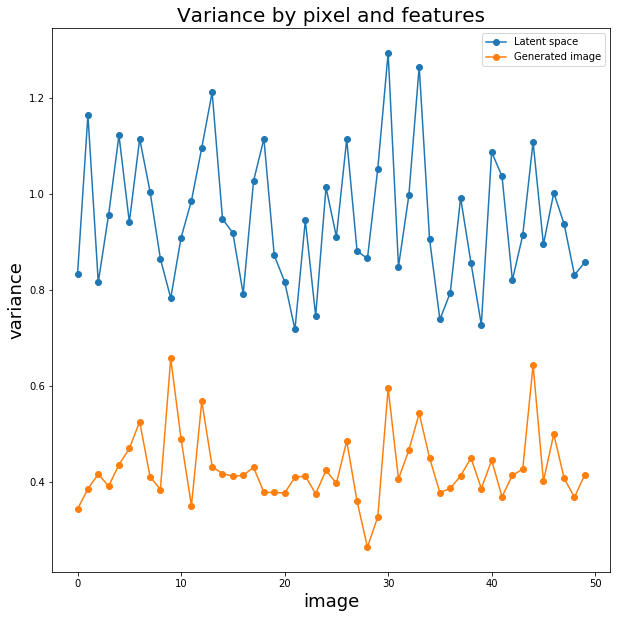

In [5]:
# Visualize
plt.figure(figsize=(10,10))
plt.title("Variance by pixel and features",fontsize=20)
plt.plot(latent_variances, 'o-', label = "Latent space")
plt.plot(image_variances, 'o-', label = "Generated image")
plt.xlabel('image', fontsize=18)
plt.ylabel('variance', fontsize=18)
plt.legend()
plt.show()

As you can see , in general the shape of variance in pixel points are similar to variance in latent space. We can conclude that the generator is good on mapping from noise to pixel point

## Variance between generated images

In [6]:
generated_variances = []

# Run experiment 50 times
for i in range(50):
    latent = generate_latent_points(100,50)
    images = model.predict(latent)
    var = np.var(images)
    generated_variances.append(var)

# Load dataset to calculate variance
dataset = load_real_samples()
real_variance = np.var(dataset)

print("NUMBER OF SAMPLE :{}".format(len(latent_variances)))
print("MEAN VARIANCE IN 50 TIMES EXPERIEMENT: {}".format(sum(generated_variances)/len(generated_variances)))
print("VARAINCE OF REAL DATASET: {}".format(real_variance))

NUMBER OF SAMPLE :50
MEAN VARIANCE IN 50 TIMES EXPERIEMENT: 0.43978744983673096
VARAINCE OF REAL DATASET: 0.49305930733680725


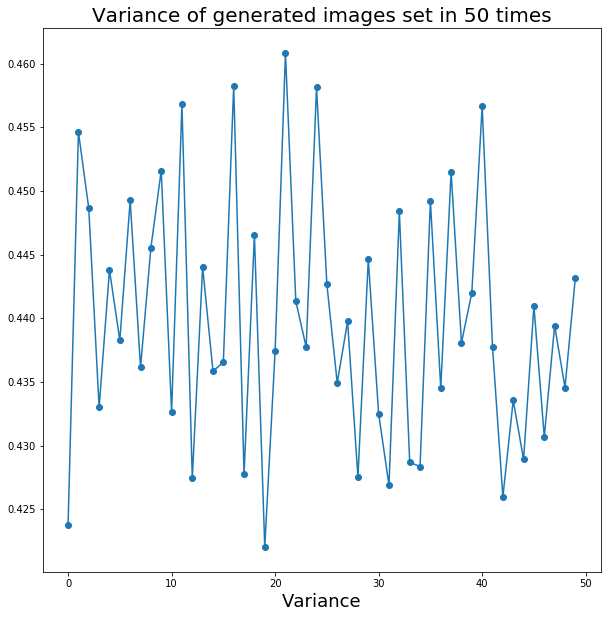

In [7]:
# Visualize 
plt.figure(figsize=(10,10))
plt.title("Variance of generated images set in 50 times",fontsize=20)
plt.plot(generated_variances, 'o-')
plt.xlabel('time', fontsize=18)
plt.xlabel('Variance', fontsize=18)
plt.show()

The mean variance of our generator after 50 experiment is 0.44 which is close to real variance obtained by dataset is 0.49. We have 3 conclusion : 

1. Model is not facing modal collapse problem which is a common problem for many GANs architecture
2. Model explores as wide as the dataset range.
3. In 50 times, the variance of whole generated dataset remains from ~0.42 -> ~ 0.47 , so the model is consitent and stable